## DATA_620: Project 3 (Text Classifier)
<b>GROUP3: </b>

+ Md. Jalal Uddin
+ Rajwant Mishra
+ Sarah Wigodsky

For this project, please work with the entire class as one collaborative group! Your project should be submitted (as a Jupyter Notebook via GitHub) by end of the due date. The group should present their code and findings in our meetup. The ability to be an effective member of a virtual team is highly valued in the data science job market.

Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can.
Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the devtest set, and the remaining 6900 words for the training set. Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. Once you are satisfied with your classifier, check its final performance on the test set. 

How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect?

Source: Natural Language Processing with Python, exercise 6.10.2.


Building data set: Using nltk function we have build gender data set called "Gender_names" here. 
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import names
import random
from nltk.classify import apply_features
nltk.download('names')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Swigo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.


True

## Data Preparation

We are going to build the dataset for our Gender Classifier with Male.txt and Female.txt 

In [2]:
Gender_names = ([(name, 'male') for name in names.words('male.txt')] +
[(name, 'female') for name in names.words('female.txt')])
random.shuffle(Gender_names)

In [3]:
Gender_names[0:10] #show the names with gender. 
len(Gender_names)
Gender_names_g= [g for (n,g) in Gender_names]
Gender_names_m = Gender_names_g.count('male')
Gender_names_f = Gender_names_g.count('female')
print("Total Male: {} and Female: {} in dataset of size: {}.".format(Gender_names_m,Gender_names_f,len(Gender_names_g)))

Total Male: 2943 and Female: 5001 in dataset of size: 7944.


## Gender Identification Features
Male and female names have distinct characteristics such as names ending in a, e, and i are likely to be female, while names ending in k, o, r, s, and t are likely to be male. We have build a classifier to model these differences more precisely. We will look for the last letter of a given name. (Source: NLP book page 222-223) 

### A. Base Gender Features: 
A classifer which focuses on Last letter of the words to identify if name is Female or Male. (Works with Last letter of the name.)

In [4]:
def gender_features_base(word):
    return {'last_letter': word[-1]}

In [5]:
gender_features_base('Justine')

{'last_letter': 'e'}

#### A 1. Train and Test featuresets using *`gender_features_base`*
Now we will divide the resulting list of feature sets into a `training` set and a `test` set after applying the feature extractor `gender_features_base` to process the `Gender_names` data.

In [6]:
featuresets_base = [(gender_features_base(n), g) for (n,g) in Gender_names]
train_set, test_set = featuresets_base[500:], featuresets_base[:500]
classifier_base = nltk.NaiveBayesClassifier.train(train_set)
accuracy_base= nltk.classify.accuracy(classifier_base, test_set)
print ("Accuracy with last letter [gender_features_base]:{}".format(accuracy_base))

Accuracy with last letter [gender_features_base]:0.748


In [7]:
#Featrues output for Ref.
featuresets_base[2]

({'last_letter': 'e'}, 'female')

Checking the classifer output with *Romeo* and *Trinity*, and the Identify the some of the *more informative features*.

In [8]:
print ("Name 'Romeo' which is Male and our classifer guess it as:",classifier_base.classify(gender_features_base('Romeo'))) #male
print ("Name 'Trinity' which is Female and our classifer guess it as:",classifier_base.classify(gender_features_base('Trinity'))) #female

Name 'Romeo' which is Male and our classifer guess it as: male
Name 'Trinity' which is Female and our classifer guess it as: female


In [9]:
classifier_base.show_most_informative_features(5)

Most Informative Features
             last_letter = 'k'              male : female =     45.0 : 1.0
             last_letter = 'a'            female : male   =     36.9 : 1.0
             last_letter = 'f'              male : female =     15.2 : 1.0
             last_letter = 'p'              male : female =     11.2 : 1.0
             last_letter = 'v'              male : female =      9.8 : 1.0


#### A 2. Featureset to Dataframe

Converting featuresets_base to dataframe, this will help us plot the frquency graph of the data.

In [10]:
df_gf = pd.DataFrame(featuresets_base, columns=['Letter','Gender'])
df_gf['LastLetter'] = df_gf['Letter'].apply(lambda x: x['last_letter'])
df_gf = df_gf[['LastLetter','Gender']]
df_gf.head()

,LastLetter,Gender
0,a,female
1,e,male
2,e,female
3,s,male
4,a,female


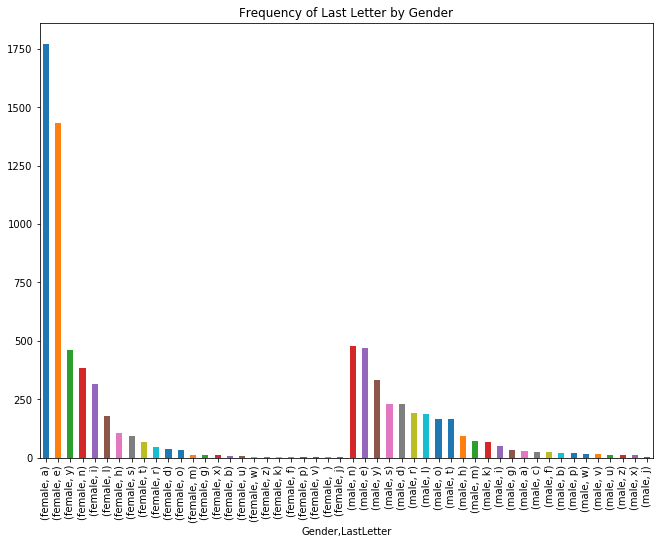

In [59]:
fig = plt.gcf() 
fig.set_size_inches(11,8)
df_gf2 = df_gf.groupby('Gender')
letter_counts = df_gf2['LastLetter'].value_counts()
letter_counts.plot.bar(title='Frequency of Last Letter by Gender')

Since we are working with large corpora, we will use  use the function
**nltk.classify.apply_features** which does not store all the feature sets in memory.

In [14]:
### DO WE NEED THIS CODE
train_set = apply_features(gender_features_base, Gender_names[500:])
test_set = apply_features(gender_features_base, Gender_names[:500])
train_set

[({'last_letter': 'k'}, 'male'), ({'last_letter': 'n'}, 'male'), ...]

### B. Gender Features A to Z : 

We are creating another Model which would be using the **Firstletter** , **Lastletter**  and also checking all the letters presence and count in features.
> Selecting relevant features and deciding how to encode them are very important to build a  good model. 

In this model each letter of the word is evaluated against 'abcdefghijklmnopqrstuvwxyz' and each occurance is counted as part of features.


In [15]:
def gender_features_az(name):
    features = {}
    features["firstletter"] = name[0].lower()
    features["lastletter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count(%s)" % letter] = name.lower().count(letter)
        features["has(%s)" % letter] = (letter in name.lower())
    return features

In [16]:
print(gender_features_az('John'))

{'firstletter': 'j', 'lastletter': 'n', 'count(a)': 0, 'has(a)': False, 'count(b)': 0, 'has(b)': False, 'count(c)': 0, 'has(c)': False, 'count(d)': 0, 'has(d)': False, 'count(e)': 0, 'has(e)': False, 'count(f)': 0, 'has(f)': False, 'count(g)': 0, 'has(g)': False, 'count(h)': 1, 'has(h)': True, 'count(i)': 0, 'has(i)': False, 'count(j)': 1, 'has(j)': True, 'count(k)': 0, 'has(k)': False, 'count(l)': 0, 'has(l)': False, 'count(m)': 0, 'has(m)': False, 'count(n)': 1, 'has(n)': True, 'count(o)': 1, 'has(o)': True, 'count(p)': 0, 'has(p)': False, 'count(q)': 0, 'has(q)': False, 'count(r)': 0, 'has(r)': False, 'count(s)': 0, 'has(s)': False, 'count(t)': 0, 'has(t)': False, 'count(u)': 0, 'has(u)': False, 'count(v)': 0, 'has(v)': False, 'count(w)': 0, 'has(w)': False, 'count(x)': 0, 'has(x)': False, 'count(y)': 0, 'has(y)': False, 'count(z)': 0, 'has(z)': False}


#### B 1. Train and Test with  *`Gender Features A to Z`* and *`Base Gender Features`* 
Accuracy of naive Bayes classifier using the feature extractor: 

In [20]:
featuresets_az = [(gender_features_az(n), g) for (n,g) in Gender_names]
train_set, test_set = featuresets_az[500:], featuresets_az[:500]
classifier_az = nltk.NaiveBayesClassifier.train(train_set)
accuracy_az= nltk.classify.accuracy(classifier_az, test_set)
print ("Accuracy with Last Letter  [classifier_base] check :{}".format(accuracy_base))
print ("Accuracy First and Last Letter [classifier_az] check :{}".format(accuracy_az))

Accuracy with Last Letter  [classifier_base] check :0.782
Accuracy First and Last Letter [classifier_az] check :0.82


In [21]:
# Listing One feature for Ref.
print(featuresets_az[1])
# list(featuresets_az[1][0].values())[0]

({'firstletter': 'a', 'lastletter': 'i', 'count(a)': 1, 'has(a)': True, 'count(b)': 0, 'has(b)': False, 'count(c)': 0, 'has(c)': False, 'count(d)': 1, 'has(d)': True, 'count(e)': 0, 'has(e)': False, 'count(f)': 0, 'has(f)': False, 'count(g)': 0, 'has(g)': False, 'count(h)': 0, 'has(h)': False, 'count(i)': 1, 'has(i)': True, 'count(j)': 0, 'has(j)': False, 'count(k)': 0, 'has(k)': False, 'count(l)': 0, 'has(l)': False, 'count(m)': 0, 'has(m)': False, 'count(n)': 0, 'has(n)': False, 'count(o)': 0, 'has(o)': False, 'count(p)': 0, 'has(p)': False, 'count(q)': 0, 'has(q)': False, 'count(r)': 0, 'has(r)': False, 'count(s)': 0, 'has(s)': False, 'count(t)': 0, 'has(t)': False, 'count(u)': 0, 'has(u)': False, 'count(v)': 0, 'has(v)': False, 'count(w)': 0, 'has(w)': False, 'count(x)': 0, 'has(x)': False, 'count(y)': 0, 'has(y)': False, 'count(z)': 0, 'has(z)': False}, 'female')


#### B 2. Featureset to Dataframe

Converting featuresets_az to dataframe, this will help us plot the frquency graph of the data.

In [22]:
df_gf_az = pd.DataFrame(featuresets_az, columns=['Letter','Gender'])
df_gf_az['Duo'] = df_gf_az['Letter'].apply(lambda x: list(x.values())[0] + list(x.values())[1]) 
df_gf_az = df_gf_az[['Duo','Gender']]
df_gf_az.head()

,Duo,Gender
0,am,male
1,ai,female
2,pn,male
3,by,male
4,ww,female


In [23]:
print(df_gf_az.shape)


(7944, 2)


Above result shows that the accuracy of classifier to count letters is about 2% more
than the accuracy of a classifier that only pays attention to the final letter of each name.

## Error analysis

First, we select a development set, containing the corpus data for creating the model. This development set is then subdivided into the *training set* and the *dev-test* set.
<br>
<br>
**devtest_names :** Unique records from 500 to 1500 Index  <br>
**train_names :** Unique records from 1500+ Index <br>
**test_names :** Unique records from 0 to 500 Index <br>

In [24]:
train_names = Gender_names[1500:]
devtest_names = Gender_names[500:1500]
test_names = Gender_names[:500]

We have divided the corpus into appropriate datasets. Then we have built a model using the training
set, and then run it on the dev-test set.

#### Running Base Gender Classifier with Last Letter (A)

In [25]:
train_set = [(gender_features_base(n), g) for (n,g) in train_names]
devtest_set = [(gender_features_base(n), g) for (n,g) in devtest_names]
test_set = [(gender_features_base(n), g) for (n,g) in test_names]
classifier_base = nltk.NaiveBayesClassifier.train(train_set)
print (nltk.classify.accuracy(classifier_base, devtest_set))

0.737


#### Running Gender Classifier with First and Last Letter(B)

In [26]:
train_set = [(gender_features_az(n), g) for (n,g) in train_names]
devtest_set = [(gender_features_az(n), g) for (n,g) in devtest_names]
test_set = [(gender_features_az(n), g) for (n,g) in test_names]
classifier_az = nltk.NaiveBayesClassifier.train(train_set)
print (nltk.classify.accuracy(classifier_az, devtest_set))

0.759


Using the dev-test set, we can generate a list of the errors that the classifier makes when
predicting name's gender:<br>
Lets use our 500 Devtest_name to check the predictions by using the `classifier_base`  with Feature method : `gender_features_base`. <br>

Here we will store all the errors in the `errors` when Predicted value is not equal to the right gender as per the test data.

##### Finding Errors on Devtest_names

In [27]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier_base.classify(gender_features_base(name))
    if guess != tag:
        errors.append( (tag, guess, name) )

errors = sorted(errors)

In [28]:
print("Out of {} names, we have noted {} errors. i.e. success of {}%".
      format(len(devtest_names),
             len(errors),
             100-(len(errors)*100)/len(devtest_names)))

Out of 1000 names, we have noted 263 errors. i.e. success of 73.7%


The names classifier that we have built generates about **229 errors** on the **devtest_names** corpus as follows, we are listing few of them as below : <br>



In [29]:
for (tag, guess, name) in errors[0:10]: # doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    print ('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Abagail                       
correct=female   guess=male     name=Aimil                         
correct=female   guess=male     name=Alison                        
correct=female   guess=male     name=Alys                          
correct=female   guess=male     name=Amber                         
correct=female   guess=male     name=Anais                         
correct=female   guess=male     name=Annabell                      
correct=female   guess=male     name=Anne-Mar                      
correct=female   guess=male     name=Arden                         
correct=female   guess=male     name=Beatriz                       


##### Finding Most Informative Features

In [30]:
classifier_base.show_most_informative_features(10)

Most Informative Features
             last_letter = 'a'            female : male   =     35.9 : 1.0
             last_letter = 'k'              male : female =     34.7 : 1.0
             last_letter = 'f'              male : female =     23.0 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'd'              male : female =     11.2 : 1.0
             last_letter = 'v'              male : female =      9.8 : 1.0
             last_letter = 'm'              male : female =      8.9 : 1.0
             last_letter = 'w'              male : female =      8.4 : 1.0
             last_letter = 'o'              male : female =      7.8 : 1.0
             last_letter = 'r'              male : female =      6.9 : 1.0


We noted that if last letter is `l` is mostly classified as *Male* but, `el` can be classified as Female.
<br>Similarly We note that `n` is  mostly classified as *Male* but, `nn/an` can be classified as Female.

### C. Gender Features Last Two Letters(gender_features_tls) : 

We will try to capture these features in our new model and build another model where we would consider the last two letters of the word and then train our model.

In [31]:
# Collect last Two Letters from the Words 
def gender_features_tls(word):
    return {'suffix1': word[-1:], 'suffix2': word[-2:]}

In [32]:
gender_features_tls("John")

{'suffix1': 'n', 'suffix2': 'hn'}

#### C 1. Train and Test with  *`gender_features_tls`* 

In [33]:
train_set = [(gender_features_tls(n), g) for (n,g) in train_names]
devtest_set = [(gender_features_tls(n), g) for (n,g) in devtest_names]
classifier_tls = nltk.NaiveBayesClassifier.train(train_set)
print ("Accuracy with model [gender_features_tls] ",nltk.classify.accuracy(classifier_tls, devtest_set))

Accuracy with model [gender_features_tls]  0.766


Rebuilding the classifier with the new feature extractor, we see that the performance
on the dev-test dataset improves by almost one percentage points from 77.1% to 78.4%

### D. Special Feature

+ **gender_features_spl**

We have created another features here which utilizes the first and last letter. It also looks for the prefix and suffix, or first and last two or three letters, depending on the name's length of a name and looks for whether or not any of the consonant clusters are present.

+ **gender_features_icv**

We are identifying all the vowels count and vowels in the name along with 1st and last letter of the name.

In [34]:
# Features with irst and last letter. It also looks for the prefix and suffix, or first and last two or three letters.
def gender_features_spl(name):
    features = {}
    temp_name = name
    cons_clusters = ["bl", "br", "ch", "cl", "cr", "dr", "fl", "fr", 
                     "gl", "gr", "pl", "pr", "sc", "sh", "sk", "sl", 
                     "sm", "sn", "sp", "st", "sw", "th", "tr", "tw", 
                     "wh", "wr", "sch", "scr", "shr", "sph", "spl", 
                     "spr", "squ", "str", "thr"]
    features["firstletter"] = name[0].lower() 
    features["lastletter"] = name[-1].lower() 
    features["prefix"] = name[:3].lower() if len(name) > 4 else name[:2].lower() 
    features["suffix"] = name[-3:].lower() if len(name) > 4 else name[-2:].lower()
    clusters = []
    for cluster in cons_clusters[::-1]:
        if cluster in temp_name:
            temp_name = temp_name.replace(cluster, "")
            clusters.append(cluster)
    features["consonant_clusters_1"] = clusters[0] if len(clusters) > 0 else None
    features["consonant_clusters_2"] = clusters[1] if len(clusters) > 1 else None
    features["consonant_clusters_3"] = clusters[2] if len(clusters) > 2 else None
    return features

### Feature with Vowels count

from scipy import spatial

def gender_features_icv(name):
    features = {}
    temp_name = name.lower()
    lenName = len(name)    
#     features["name_len"] = len(name)
    features["firstletter"] = name[0].lower() 
    features["lastletter"] = name[-1].lower() 
    features["prefix"] = name[:3].lower() if len(name) > 4 else name[:2].lower() 
    features["suffix"] = name[-3:].lower() if len(name) > 4 else name[-2:].lower()
    Vowel = ['a','e','i','o','u']
    Vclusters = []
    flag = False
    for vb in Vowel[::-1]:
        if vb in temp_name:
            n_vowels= temp_name.count(vb) # COunt how many times you see Vowels            
            temp_name = temp_name.replace(vb, "")
            Vclusters.append(vb)
            features[vb]=n_vowels
#             features["Len_vowel"] = features["Len_vowel"] + n_vowels

    return features

##### Features test with class_gender_features4

In [35]:
gender_features_spl("Andrew")

{'firstletter': 'a',
 'lastletter': 'w',
 'prefix': 'and',
 'suffix': 'rew',
 'consonant_clusters_1': 'dr',
 'consonant_clusters_2': None,
 'consonant_clusters_3': None}

##### Features test with gender_features_icv

In [36]:
gender_features_icv("Andrew")

{'firstletter': 'a',
 'lastletter': 'w',
 'prefix': 'and',
 'suffix': 'rew',
 'e': 1,
 'a': 1}

### D 1. Train and Test with new Two news Models

Using feature **class_gender_features4** for extrating classifier.

In [37]:
train_set = [(gender_features_spl(n), g) for (n,g) in train_names]
devtest_set = [(gender_features_spl(n), g) for (n,g) in devtest_names]
classifier_spl = nltk.NaiveBayesClassifier.train(train_set)
print (nltk.classify.accuracy(classifier_spl, devtest_set))

0.81


Using feature **gender_features_icv** for extrating classifier.

In [38]:
train_set = [(gender_features_icv(n), g) for (n,g) in train_names]
devtest_set = [(gender_features_icv(n), g) for (n,g) in devtest_names]
classifier_icv = nltk.NaiveBayesClassifier.train(train_set)
print (nltk.classify.accuracy(classifier_icv, devtest_set))

0.817


### D 2. Check Informative Features


In [39]:
print("---------------------------------------------------------------------------------")
print("----------------------------Classifier classifier_spl----------------------------")
print("---------------------------------------------------------------------------------")
print(classifier_spl.show_most_informative_features(25))
print("---------------------------------------------------------------------------------")
print("----------------------------Classifier classifier_icv----------------------------")
print("---------------------------------------------------------------------------------")
print(classifier_icv.show_most_informative_features(25))

---------------------------------------------------------------------------------
----------------------------Classifier classifier_spl----------------------------
---------------------------------------------------------------------------------
Most Informative Features
              lastletter = 'a'            female : male   =     35.9 : 1.0
              lastletter = 'k'              male : female =     34.7 : 1.0
                  suffix = 'ard'            male : female =     25.7 : 1.0
              lastletter = 'f'              male : female =     23.0 : 1.0
                  suffix = 'tta'          female : male   =     22.6 : 1.0
                  suffix = 'nne'          female : male   =     17.2 : 1.0
                  suffix = 'vin'            male : female =     17.1 : 1.0
                  suffix = 'na'           female : male   =     15.7 : 1.0
                  suffix = 'old'            male : female =     15.0 : 1.0
                  suffix = 'son'            male : fe

### D 3. Check Erros on Devtest set

* Erros from classifier_spl Model
* Erros from classifier_icv Model

In [40]:
#--------------Errors with classifier_spl Model
errors = []
for (name, tag) in devtest_names:
    guess = classifier_spl.classify(gender_features_spl(name))
    if guess != tag:
        errors.append( (tag, guess, name) )

errors = sorted(errors)
    
print("With [classifier_spl] Out of {} names, we have noted {} errors. i.e. success of {}%".
      format(len(devtest_names),
             len(errors),
             100-(len(errors)*100)/len(devtest_names)))

#-------------- Erros with classifier_icv Model
errors = []
for (name, tag) in devtest_names:
    guess = classifier_icv.classify(gender_features_icv(name))
    if guess != tag:
        errors.append( (tag, guess, name) )

errors = sorted(errors)

print("With [classifier_icv] Out of {} names, we have noted {} errors. i.e. success of {}%".
      format(len(devtest_names),
             len(errors),
             100-(len(errors)*100)/len(devtest_names)))


With [classifier_spl] Out of 1000 names, we have noted 190 errors. i.e. success of 81.0%
With [classifier_icv] Out of 1000 names, we have noted 183 errors. i.e. success of 81.7%


### Test with All the Model

We are using test size of 50% and then run all of the features on the train data to classifie and test it on the Test data, and also check the accuracy.

In [42]:
from sklearn.model_selection import train_test_split #split the test data to 50% of total data 

# Full Dataset copy in base_data
base_data = [(n, g) for (n,g) in Gender_names]
# split data into training and test data.
gl_train_set, gl_test_set = train_test_split(base_data,train_size=0.5,test_size=0.5,shuffle =True)

featuresets_train = [(gender_features_base(n), g) for (n,g) in gl_train_set]
featuresets_test = [(gender_features_base(n), g) for (n,g) in gl_test_set]

featuresets_az_train = [(gender_features_az(n), g) for (n,g) in gl_train_set]
featuresets_az_test = [(gender_features_az(n), g) for (n,g) in gl_test_set]

featuresets_tls_train = [(gender_features_tls(n), g) for (n,g) in gl_train_set]
featuresets_tls_test = [(gender_features_tls(n), g) for (n,g) in gl_test_set]

featuresets_spl_train = [(gender_features_spl(n), g) for (n,g) in gl_train_set]
featuresets_spl_test = [(gender_features_spl(n), g) for (n,g) in gl_test_set]

featuresets_icv_train = [(gender_features_icv(n), g) for (n,g) in gl_train_set]
featuresets_icv_test = [(gender_features_icv(n), g) for (n,g) in gl_test_set]


classifier = nltk.NaiveBayesClassifier.train(featuresets_train)
classifier_az = nltk.NaiveBayesClassifier.train(featuresets_az_train)
classifier_spl = nltk.NaiveBayesClassifier.train(featuresets_spl_train)
classifier_tls = nltk.NaiveBayesClassifier.train(featuresets_tls_train)
classifier_icv = nltk.NaiveBayesClassifier.train(featuresets_icv_train)



accuracy_base= nltk.classify.accuracy(classifier, featuresets_test)
accuracy_az= nltk.classify.accuracy(classifier_az, featuresets_az_test)
accuracy_spl= nltk.classify.accuracy(classifier_spl, featuresets_spl_test)
accuracy_tls= nltk.classify.accuracy(classifier_tls, featuresets_tls_test)
accuracy_icv= nltk.classify.accuracy(classifier_icv, featuresets_icv_test)

print ("1. Accuracy with Last Letter  [classifier] check:                           {}".format(accuracy_base))
print ("2. Accuracy First and Last Letter [classifier_az] check :                   {}".format(accuracy_az))
print ("3. Accuracy Last Two Letter [classifier_tls] check:                         {}".format(accuracy_tls))
print ("4. Accuracy First and Last Letter and last 2 letter [classifier_spl] check: {}".format(accuracy_spl))
print ("5. Accuracy With All+ Vowels [classifier_icv] check:                        {}".format(accuracy_icv))

1. Accuracy with Last Letter  [classifier] check:                           0.7575528700906344
2. Accuracy First and Last Letter [classifier_az] check :                   0.7726586102719033
3. Accuracy Last Two Letter [classifier_tls] check:                         0.7787009063444109
4. Accuracy First and Last Letter and last 2 letter [classifier_spl] check: 0.824773413897281
5. Accuracy With All+ Vowels [classifier_icv] check:                        0.8250251762336355


### Testing accuracy
We will test the accuracy of of both gender features of finding the gender by last name and counting the letters of names here. To do this, we will run each function 100 times.

In [ ]:
STOP STOP STOP STOP STOP STOP STOP STOP STOP STOP STOP STOP STOP STOP STOP STOP STOP STOP STOP STOP STOP 
EXECUTION EXECUTION  EXECUTION  EXECUTION  EXECUTION  EXECUTION  EXECUTION  EXECUTION  EXECUTION  EXECUTION 
Add on purpose so that we don't run the below code again which would change the conclusion .

In [43]:
# This Function take number of Runs and Feature Extractor as input.
def accuracy(number_of_runs, function_to_use):
    acc_df = {
        "classifier": [],
        "train_set_accuracy": [],
        "test_set_accuracy": [],
        "devtest_set_accuracy": [],
        "devtest_errors": []
    }
    for i in range(number_of_runs):
        random.shuffle(Gender_names)
        acc_train_names = Gender_names[1000:]
        acc_devtest_names = Gender_names[500:1000]
        acc_test_names = Gender_names[:500]
        acc_train_set = [(function_to_use(n), g) for (n,g) in acc_train_names]
        acc_devtest_set = [(function_to_use(n), g) for (n,g) in acc_devtest_names]
        acc_test_set = [(function_to_use(n), g) for (n,g) in acc_test_names]
        acc_classifier = nltk.NaiveBayesClassifier.train(acc_train_set)
        acc_df["classifier"].append(acc_classifier)
        acc_df["train_set_accuracy"].append(nltk.classify.accuracy(acc_classifier, acc_train_set))
        acc_df["test_set_accuracy"].append(nltk.classify.accuracy(acc_classifier, acc_test_set))
        acc_df["devtest_set_accuracy"].append(nltk.classify.accuracy(acc_classifier, acc_devtest_set))
        acc_errors = []
        for (name, tag) in acc_devtest_names:
            acc_guess = acc_classifier.classify(function_to_use(name))
            if acc_guess != tag:
                acc_errors.append( (tag, acc_guess, name) )
        acc_df["devtest_errors"].append(acc_errors)
    acc_df = pd.DataFrame.from_dict(acc_df)
    return(acc_df)

##### Running accuracy test with Fifity runs and all the Classifier we have created so far.

In [44]:
Accuracy_df_base = accuracy(50, gender_features_base)
Accuracy_df_az = accuracy(50, gender_features_az)
Accuracy_df_spl = accuracy(50, gender_features_spl)
Accuracy_df_icv = accuracy(50, gender_features_icv)

In [113]:
df_test_acc = pd.concat([Accuracy_df_base.describe()['test_set_accuracy'], 
                  Accuracy_df_az.describe()['test_set_accuracy'],
                  Accuracy_df_spl.describe()['test_set_accuracy'],
                  Accuracy_df_icv.describe()['test_set_accuracy']], axis=1)
print("Classifier Results with Test data")
df_test_acc.columns = ['Base Classifier', 'AtoZ Classifier','Classifier SPL','Classifier ICV']


def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df_test_acc.iloc[1:].style.apply(highlight_max,axis=1)


Classifier Results with Test data


,Base Classifier,AtoZ Classifier,Classifier SPL,Classifier ICV
mean,0.75932,0.77132,0.83448,0.83184
std,0.0147447,0.0182974,0.0169058,0.0179379
min,0.718,0.738,0.798,0.786
25%,0.75,0.758,0.824,0.822
50%,0.76,0.771,0.832,0.831
75%,0.768,0.784,0.844,0.842
max,0.798,0.808,0.872,0.88


### Conclusion 

The **Mean** of accuracy of the *test data* with the **Base Classifier** is ~76% where as with **Classifier SPL** it's 83.48%.
We also noted that **Classifier SPL** is doing better in all the stats of the accuracy, also with **Classifer ICV** we noted **Maximum accuracy of 88%** in total 50 runs of the data.

We tried many approaches:
* Cosine distance of Vowels
* Consonant Count = Total length - Length of Vowel
* Cosine distance of 1st and 2nd letter, 2nd and 3rd letter, last and 2nd last letter.

All the above approaches with new features,resulted in worst or no improvement in the overall accuracy with  **Classifier ICV**. By using a simple technique of identifying the vowels we were able to  achieve 8% extra accuracy from model **AtoZ Classifier**  with max accuracy of 80% to 88%.
